In [1]:
import pandas as pd 

In [2]:
df1 = pd.read_csv("data_football_ratings.csv",encoding="latin-1", sep=",")
pd.set_option('display.max_columns', None)

In [3]:
df1.head(5)
# crosses_acc:nombre de centrages reussis
#lballs_acc: centrage plus de 23 
#grduels_w:moujahat mobachira najiha
#aerials_w: moujahat haouiya najiha
#poss_lost:3ada merrat fo9dan lkora
#wasfouled:Nombre de fois où le joueur a été victime de fautes lors du match
#clearances:Nombre de dégagements réalisés par le joueur lors du match
#tackles:zwal koora mn rjline
#interceptions:koora li kadti f9lb passa
# dribbled_past:Nombre de fois où le joueur s'est fait dribbler par un adversaire lors du match
#drib_success:chhal merra dazouh 
#tballs_acc:korat bynia 
#dangmistakes:tadakholat l3anifa 
#countattack:"Nombre de contre-attaques initiées par le joueur lors du match" 
#GOAL: 
#goals_ag_itb:number of goals received from Outside the Box 
#goals_ag_itb:number of goals received from Inside the Box 
#saves_itb:number of saves made of shots coming from Outside the Box 
#saves_otb:number of saves made of shots coming from Inside the Box 
#saved_pen:number of penalty kicks saved. 

# Penaliy 
#missed_penalties:Number of penalty kicks missed by the player at the match.
#owngoals:Number of Own Goals scored by the player at the match.(chhal marka 3la rasso)
#degree_centrality:chhal sahm f les passe  nisba mo9rant bshabo 
#betweenness_centrality:c'est a dire le joeur est disponible dans le plus courte chemin??
#flow_centrality:  met en évidence l'importance d'un joueur dans le flux de passes de son équipe, en se basant sur sa participation active et sa capacité à maintenir le jeu fluide et coordonné.(daraja dial tfra9 koora)
#"Flow_success" est une mesure qui provient de la théorie des réseaux et qui capture le pourcentage des actions de l'équipe dans lesquelles le joueur a été impliqué et qui se sont terminées par une tentative de tir au but.
#"Betweenness2Goals" donc c'est la contribution de joueur pour marquer les butes ??


#game_duration:chhal match fih (90 minute wla 120 minute) 

competition        date                    match     team  pos pos_role  \
0   Euro 2016  10/06/2016  France - Romania, 2 - 1  Romania   DF       DC   
1   Euro 2016  10/06/2016  France - Romania, 2 - 1  Romania   DF       DC   
2   Euro 2016  10/06/2016  France - Romania, 2 - 1  Romania   DF       DC   
3   Euro 2016  10/06/2016  France - Romania, 2 - 1   France  Sub      Sub   
4   Euro 2016  10/06/2016  France - Romania, 2 - 1  Romania   MF      DMC   

            player      rater  is_human  original_rating  goals  assists  \
0   Dragos Grigore     Kicker         1             3.50      0        0   
1   Dragos Grigore  WhoScored         0             6.56      0        0   
2   Dragos Grigore  SofaScore         0             6.70      0        0   
3  Anthony Martial  WhoScored         0             6.19      0        0   
4   Mihai Pintilii     Kicker         1             3.50      0        0   

   shots_ontarget  shots_offtarget  shotsblocked  chances2score  drib_success  \
0               0                0             0              0             0   
1               0                0             0              0             0   
2               0                0             0              0             0   
3               1                0             0              1             1   
4               0                1             0              1             2   

   drib_unsuccess  keypasses  touches  passes_acc  passes_inacc  crosses_acc  \
0               0          0       34          20             5            0   
1               0          0       34          20             5            0   
2               0          0       34          20             5            0   
3               0          0       10           3             1            0   
4               0          0       60          31             9            0   

   crosses_inacc  lballs_acc  lballs_inacc  grduels_w  grduels_l  aerials_w  \
0              0           5             1          0          2          0   
1              0           5             1          0          2          0   
2              0           5             1          0          2          0   
3              0           0             0          2          0          0   
4              0           4             5          5          6          1   

   aerials_l  poss_lost  fouls  wasfouled  clearances  stop_shots  \
0          3         11      0          0           8           0   
1          3         11      0          0           8           0   
2          3         11      0          0           8           0   
3          0          2      0          0           1           0   
4          1         14      4          1           4           0   

   interceptions  tackles  dribbled_past  tballs_acc  tballs_inacc  ycards  \
0              3        0              0           0             0       0   
1              3        0              0           0             0       0   
2              3        0              0           0             0       0   
3              0        0              0           0             0       0   
4              7        3              4           0             0       0   

   rcards  dangmistakes  countattack  offsides  goals_ag_otb  goals_ag_itb  \
0       0             0            2         1             0             0   
1       0             0            2         1             0             0   
2       0             0            2         1             0             0   
3       0             0            0         0             0             0   
4       0             0            2         0             0             0   

   saves_itb  saves_otb  saved_pen  missed_penalties  owngoals  \
0          0          0          0                 0         0   
1          0          0          0                 0         0   
2          0          0          0                 0         0   
3          0          

In [12]:
def calculate_score(group):
    group["score"] = group["some rate"] / group["nombre of rate"]
    return group

df1 = df1.drop(df1[df1.eq('Kicker').any(axis=1)].index)

df1["nombre of rate"] = df1.groupby(["match", "player"])["rater"].transform('count')
df1["some rate"] = df1.groupby(["match", "player", "team", "competition", "date"])["original_rating"].transform('sum')

df1 = df1.groupby(["match", "player"]).apply(calculate_score)


C:\Users\ADNAN MHEDAOUI\AppData\Local\Temp\ipykernel_10348\4076020035.py:10: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df1 = df1.groupby(["match", "player"]).apply(calculate_score)


In [86]:
selected_columns = df1.loc[df1["player"] == "Cristiano Ronaldo", ~df1.columns.isin(["competition","match","pos" ,"date", "team", "pos_role", "player", "rater", "is_human", "original_rating", "is_home_team", "game_duration"])]
first_row = selected_columns.iloc[0]
first_row

goals                      0.000000
assists                    0.000000
shots_ontarget             1.000000
shots_offtarget            6.000000
shotsblocked               3.000000
chances2score              5.000000
drib_success               1.000000
drib_unsuccess             2.000000
keypasses                  1.000000
touches                   61.000000
passes_acc                29.000000
passes_inacc               2.000000
crosses_acc                1.000000
crosses_inacc              1.000000
lballs_acc                 0.000000
lballs_inacc               0.000000
grduels_w                 10.000000
grduels_l                  4.000000
aerials_w                  1.000000
aerials_l                  3.000000
poss_lost                 18.000000
fouls                      1.000000
wasfouled                  3.000000
clearances                 2.000000
stop_shots                 0.000000
interceptions              0.000000
tackles                    0.000000
dribbled_past              0

In [26]:
df1=df1.drop(columns="some rate") 
df1=df1.drop(columns="nombre of rate")

KeyError: "['some rate'] not found in axis"

In [ ]:
df1.head()

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41104 entries, 1 to 50651
Data columns (total 64 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   competition             41104 non-null  object 
 1   date                    41104 non-null  object 
 2   match                   41104 non-null  object 
 3   team                    41104 non-null  object 
 4   pos                     41104 non-null  object 
 5   pos_role                41104 non-null  object 
 6   player                  41104 non-null  object 
 7   rater                   41104 non-null  object 
 8   is_human                41104 non-null  int64  
 9   original_rating         41104 non-null  float64
 10  goals                   41104 non-null  int64  
 11  assists                 41104 non-null  int64  
 12  shots_ontarget          41104 non-null  int64  
 13  shots_offtarget         41104 non-null  int64  
 14  shotsblocked            41104 non-null

In [17]:
df1.describe()

is_human  original_rating         goals       assists  \
count  41104.000000     41104.000000  41104.000000  41104.000000   
mean       0.422051         6.196984      0.098798      0.061065   
std        0.493893         1.371564      0.334527      0.255667   
min        0.000000         1.000000      0.000000      0.000000   
25%        0.000000         6.000000      0.000000      0.000000   
50%        0.000000         6.400000      0.000000      0.000000   
75%        1.000000         7.000000      0.000000      0.000000   
max        1.000000        10.000000      4.000000      3.000000   

       shots_ontarget  shots_offtarget  shotsblocked  chances2score  \
count    41104.000000     41104.000000  41104.000000   41104.000000   
mean         0.295908         0.550628      0.214480       0.559946   
std          0.627835         0.874738      0.508094       0.929376   
min          0.000000         0.000000      0.000000       0.000000   
25%          0.000000         0.000000      0.000000       0.000000   
50%          0.000000         0.000000      0.000000       0.000000   
75%          0.000000         1.000000      0.000000       1.000000   
max          7.000000         7.000000      4.000000       8.000000   

       drib_success  drib_unsuccess     keypasses       touches    passes_acc  \
count  41104.000000    41104.000000  41104.000000  41104.000000  41104.000000   
mean       0.512359        0.342229      0.238979     46.441466     27.467692   
std        0.943631        0.705028      0.572792     25.505854     20.155100   
min        0.000000        0.000000      0.000000      1.000000      0.000000   
25%        0.000000        0.000000      0.000000     28.000000     13.000000   
50%        0.000000        0.000000      0.000000     44.000000     23.000000   
75%        1.000000        0.000000      0.000000     62.000000     37.000000   
max       10.000000        7.000000      6.000000    188.000000    168.000000   

       passes_inacc   crosses_acc  crosses_inacc    lballs_acc  lballs_inacc  \
count  41104.000000  41104.000000   41104.000000  41104.000000  41104.000000   
mean       5.002019      0.459663       0.896117      2.770047      1.919497   
std        3.294286      0.905198       1.447240      3.157259      1.983673   
min        0.000000      0.000000       0.000000      0.000000      0.000000   
25%        3.000000      0.000000       0.000000      0.000000      0.000000   
50%        5.000000      0.000000       0.000000      2.000000      1.000000   
75%        7.000000      1.000000       1.000000      4.000000      3.000000   
max       23.000000     11.000000      12.000000     28.000000     17.000000   

          grduels_w     grduels_l     aerials_w     aerials_l     poss_lost  \
count  41104.000000  41104.000000  41104.000000  41104.000000  41104.000000   
mean       3.123613      3.096244      1.573521      1.479978      9.133126   
std        2.817771      2.526079      2.069610      1.866109      5.242441   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.000000      1.000000      0.000000      0.000000      5.000000   
50%        3.000000      3.000000      1.000000      1.000000      9.000000   
75%        5.000000      5.000000      2.000000      2.000000     12.000000   
max       27.000000     18.000000     20.000000     25.000000     37.000000   

              fouls     wasfouled    clearances    stop_shots  interceptions  \
count  41104.000000  41104.000000  41104.000000  41104.000000   41104.000000   
mean       0.930299      0.862446      1.154583      0.223141       1.901615   
std        1.111624      1.112750      1.665256      0.549993       1.856558   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%        0.000000      0.000000      0.000000      0.000000       0.000000   
50%        1.000000      1.000000      1.000000      0.000000       1.000000   
75%        1.000000      1.000000  

In [18]:
df1.isnull()

competition   date  match   team    pos  pos_role  player  rater  \
1            False  False  False  False  False     False   False  False   
2            False  False  False  False  False     False   False  False   
3            False  False  False  False  False     False   False  False   
5            False  False  False  False  False     False   False  False   
6            False  False  False  False  False     False   False  False   
...            ...    ...    ...    ...    ...       ...     ...    ...   
50647        False  False  False  False  False     False   False  False   
50648        False  False  False  False  False     False   False  False   
50649        False  False  False  False  False     False   False  False   
50650        False  False  False  False  False     False   False  False   
50651        False  False  False  False  False     False   False  False   

       is_human  original_rating  goals  assists  shots_ontarget  \
1         False            False  False    False           False   
2         False            False  False    False           False   
3         False            False  False    False           False   
5         False            False  False    False           False   
6         False            False  False    False           False   
...         ...              ...    ...      ...             ...   
50647     False            False  False    False           False   
50648     False            False  False    False           False   
50649     False            False  False    False           False   
50650     False            False  False    False           False   
50651     False            False  False    False           False   

       shots_offtarget  shotsblocked  chances2score  drib_success  \
1                False         False          False         False   
2                False         False          False         False   
3                False         False          False         False   
5                False         False          False         False   
6                False         False          False         False   
...                ...           ...            ...           ...   
50647            False         False          False         False   
50648            False         False          False         False   
50649            False         False          False         False   
50650            False         False          False         False   
50651            False         False          False         False   

       drib_unsuccess  keypasses  touches  passes_acc  passes_inacc  \
1               False      False    False       False         False   
2               False      False    False       False         False   
3               False      False    False       False         False   
5               False      False    False       False         False   
6               False      False    False       False         False   
...               ...        ...      ...         ...           ...   
50647           False      False    False       False         False   
50648           False      False    False       False         False   
50649           False      False    False       False         False   
50650           False      False    False       False         False   
50651           False      False    False       False         False   

       crosses_acc  crosses_inacc  lballs_acc  lballs_inacc  grduels_w  \
1            False          False       False         False      False   
2            False          False       False         False      False   
3            False          False       False         False      False   
5            False          False       False         False      False   
6            False          False       False         False      False   
...            ...            ...         ...           ...        ...   
50647        False          False       False         False      False   
50648        Fa

In [19]:
df1.isnull().sum()

competition      0
date             0
match            0
team             0
pos              0
                ..
lost             0
is_home_team     0
minutesPlayed    0
game_duration    0
score            0
Length: 64, dtype: int64

In [20]:
df1.corr()

C:\Users\ADNAN MHEDAOUI\AppData\Local\Temp\ipykernel_10348\473017434.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


is_human  original_rating     goals   assists  \
is_human                1.000000        -0.512160  0.013702  0.006676   
original_rating        -0.512160         1.000000  0.163374  0.107518   
goals                   0.013702         0.163374  1.000000  0.063439   
assists                 0.006676         0.107518  0.063439  1.000000   
shots_ontarget          0.012521         0.134325  0.582120  0.102501   
shots_offtarget         0.010514         0.065388  0.140002  0.089958   
shotsblocked            0.009520         0.055160  0.078152  0.069231   
chances2score           0.009067         0.081573  0.182805  0.113504   
drib_success            0.007496         0.080310  0.102760  0.100640   
drib_unsuccess          0.013066         0.019701  0.091726  0.090162   
keypasses               0.006036         0.081217  0.073579  0.109841   
touches                 0.042471         0.105027  0.000765  0.084549   
passes_acc              0.029972         0.079620 -0.030560  0.053224   
passes_inacc            0.047281         0.041132  0.003153  0.069787   
crosses_acc             0.008476         0.060210  0.016013  0.188621   
crosses_inacc           0.014846         0.040187  0.018989  0.100979   
lballs_acc              0.023672        -0.005006 -0.102831 -0.030647   
lballs_inacc            0.031303         0.019724 -0.084400 -0.007624   
grduels_w               0.021600         0.106916  0.134754  0.128389   
grduels_l               0.027893         0.023468  0.097172  0.066919   
aerials_w               0.017365         0.064227  0.020309 -0.024716   
aerials_l               0.016719         0.019330  0.100970  0.013679   
poss_lost               0.042721         0.084307  0.074835  0.123012   
fouls                   0.007896        -0.024132  0.057053  0.020455   
wasfouled               0.004129         0.034353  0.089253  0.065015   
clearances              0.013409         0.054601 -0.059647 -0.042230   
stop_shots              0.010564         0.034480 -0.042602 -0.038771   
interceptions           0.028092         0.029913 -0.055761  0.000971   
tackles                 0.021578         0.042043 -0.050828  0.001975   
dribbled_past           0.015548        -0.018060 -0.030516  0.026619   
tballs_acc              0.006975         0.071868  0.068663  0.176389   
tballs_inacc            0.013236         0.054780  0.056941  0.088019   
ycards                  0.008088        -0.024920 -0.010532 -0.001003   
rcards                  0.001837        -0.033385 -0.007157  0.001559   
dangmistakes            0.000129        -0.005051 -0.011324  0.001277   
countattack             0.012274         0.091927  0.166125  0.139776   
offsides                0.011733         0.016439  0.155336  0.057008   
goals_ag_otb            0.004023        -0.031304 -0.031058 -0.025117   
goals_ag_itb            0.008680        -0.065344 -0.059703 -0.047438   
saves_itb               0.007672        -0.001074 -0.063154 -0.050083   
saves_otb               0.004497         0.005017 -0.062480 -0.049841   
saved_pen               0.003643         0.014760 -0.013758 -0.011126   
missed_penalties        0.002632        -0.001558  0.030483 -0.003102   
owngoals                0.000772        -0.019634 -0.011024 -0.007430   
degree_centrality       0.045641         0.084177  0.075822  0.100668   
betweenness_centrality  0.030061         0.064784  0.048643  0.068190   
closeness_centrality    0.040583         0.069795  0.089017  0.106738   
flow_centrality         0.041337         0.101598  0.015842  0.095065   
flow_success            0.027831         0.103253  0.166785  0.172999   
betweenness2goals      -0.002267         0.119631  0.427743  0.353414   
win                    -0.000542         0.144814  0.178446  0.159091   
lost                   -0.000731        -0.143545 -0.139357 -0.115192   
is_home_team            0.044812        -0.033497  0.046844  0.038673   
minutesPlayed           0.043351         0.055331  0.032225  0.043176   
game_dura

C:\Users\ADNAN MHEDAOUI\AppData\Local\Temp\ipykernel_10348\2992104193.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrice_correlation = df1.corr()


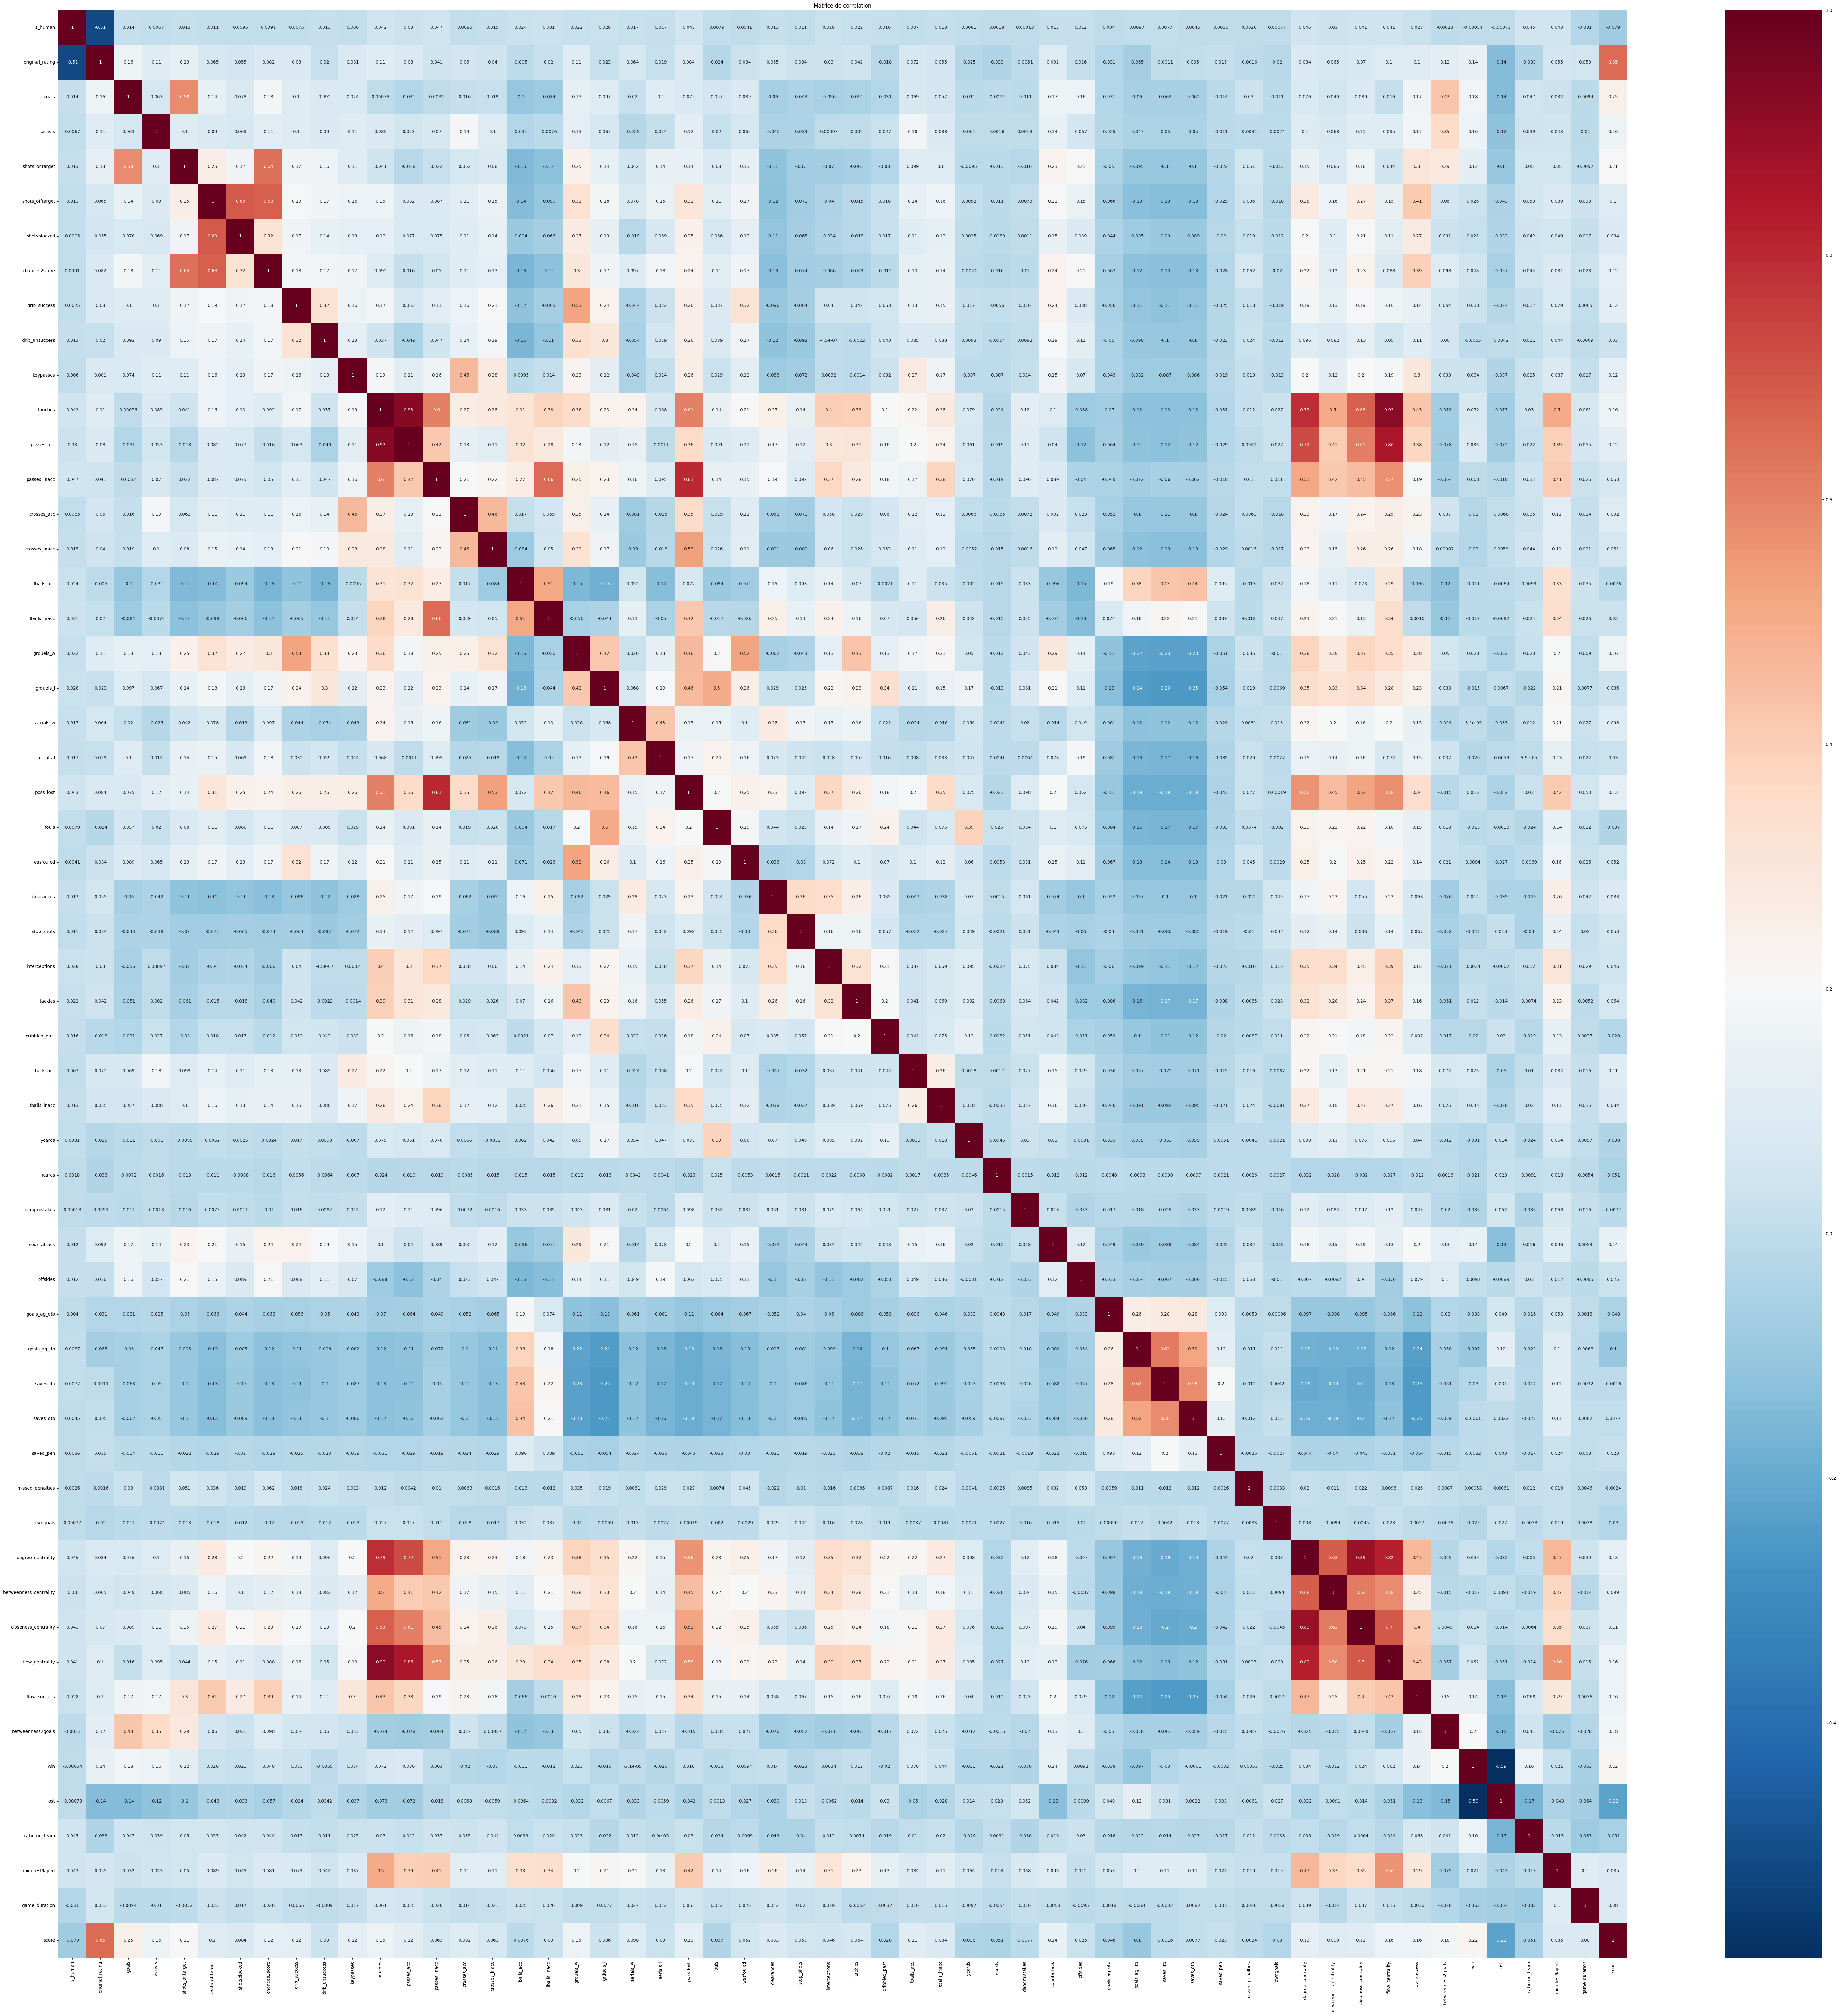

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

matrice_correlation = df1.corr()

plt.figure(figsize=(80, 80))
sns.heatmap(matrice_correlation, annot=True, cmap='RdBu_r')
plt.title("Matrice de corrélation")
plt.show()

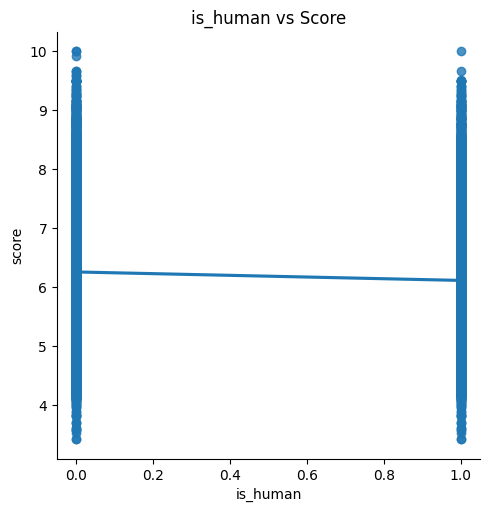

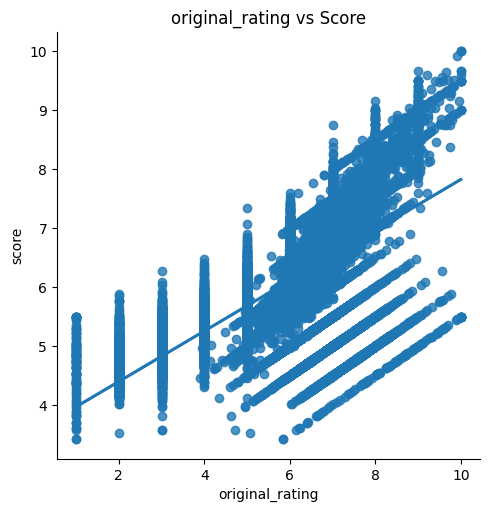

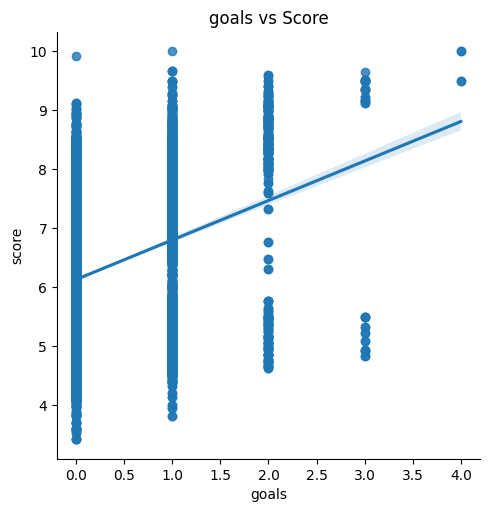

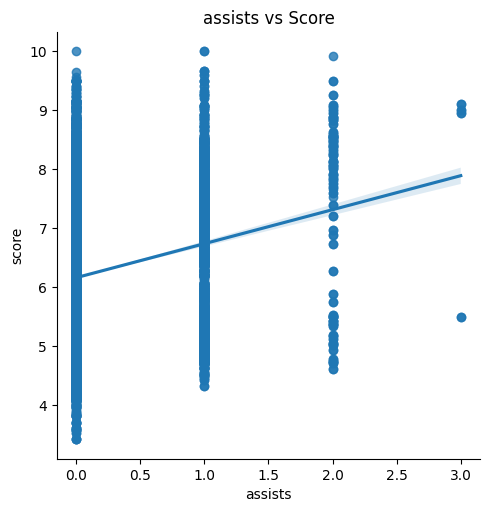

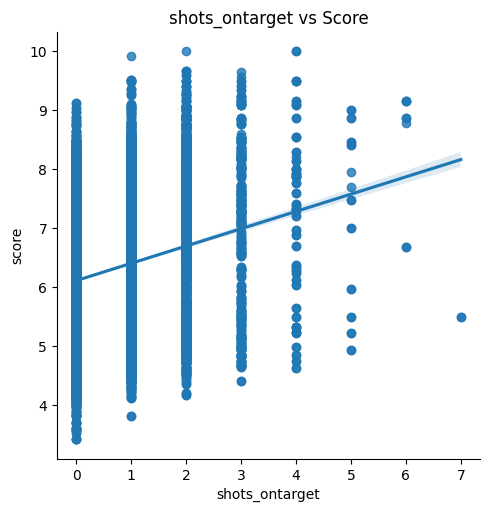

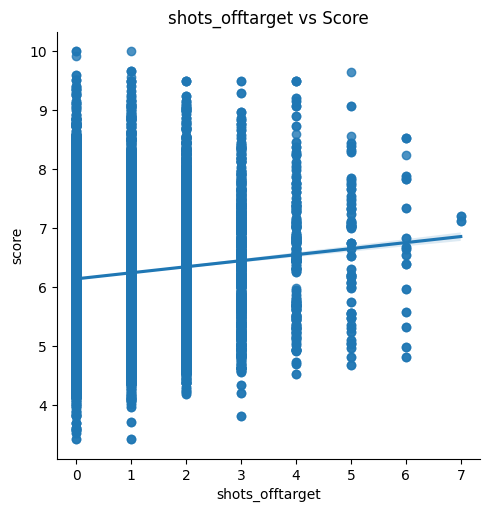

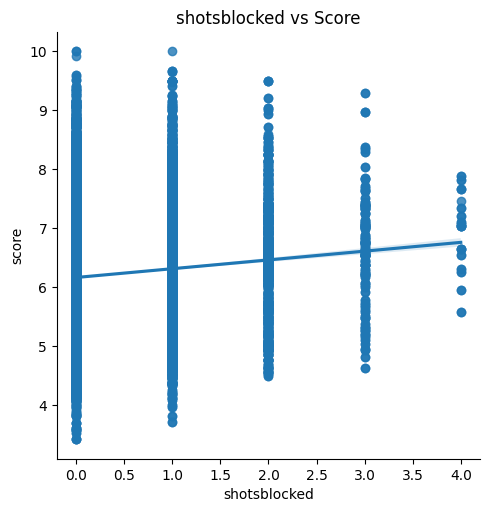

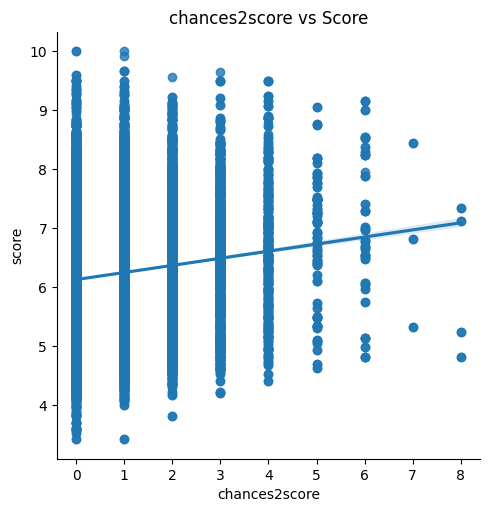

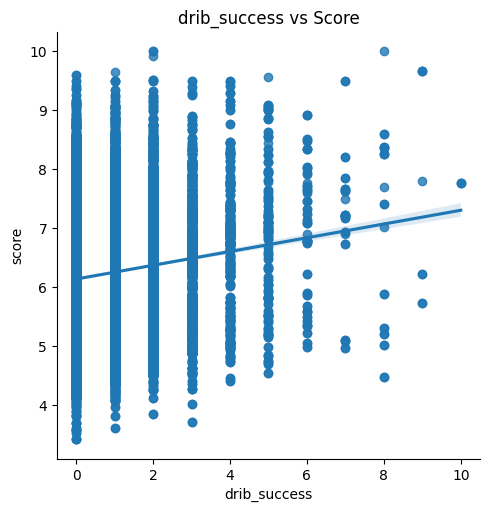

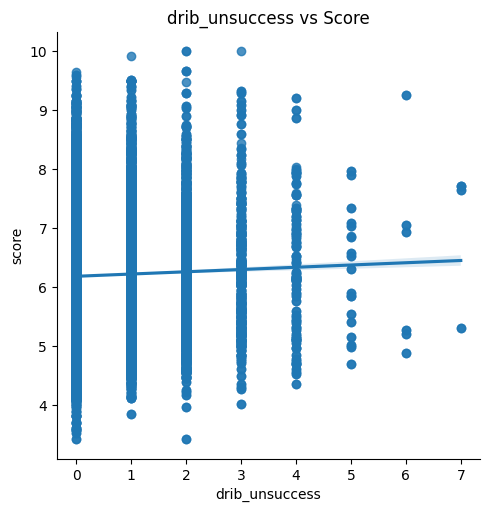

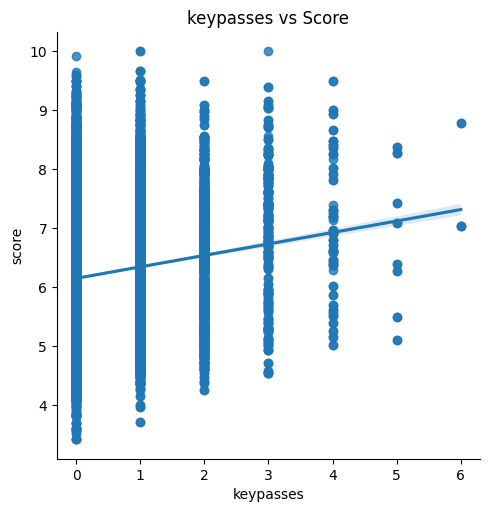

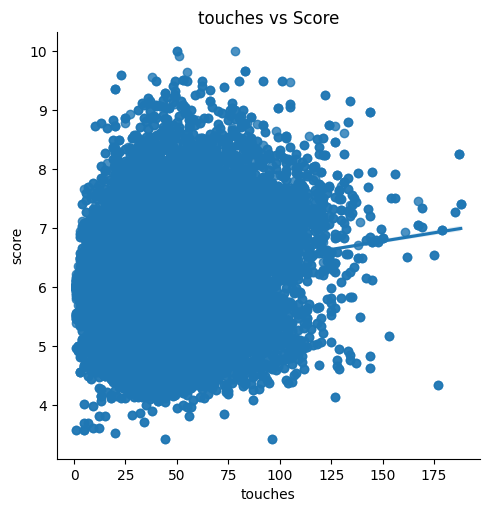

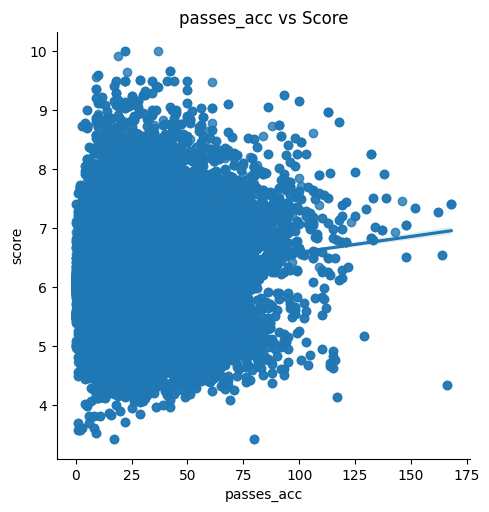

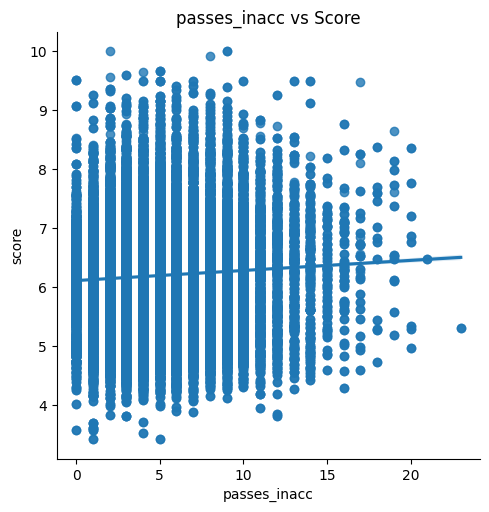

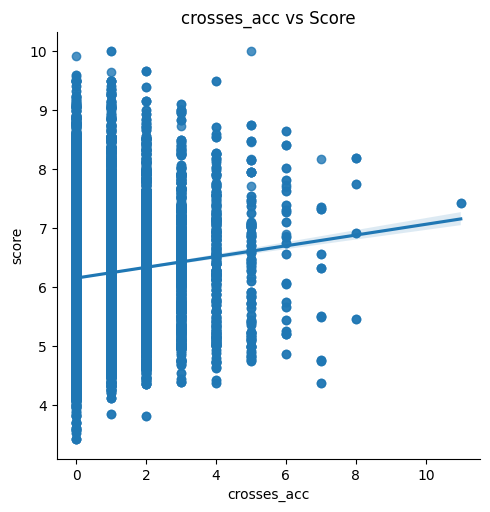

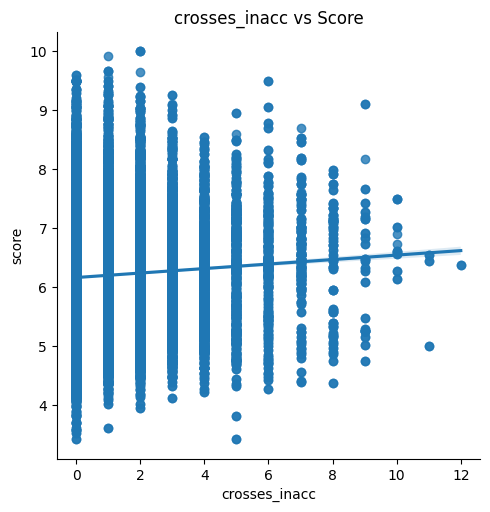

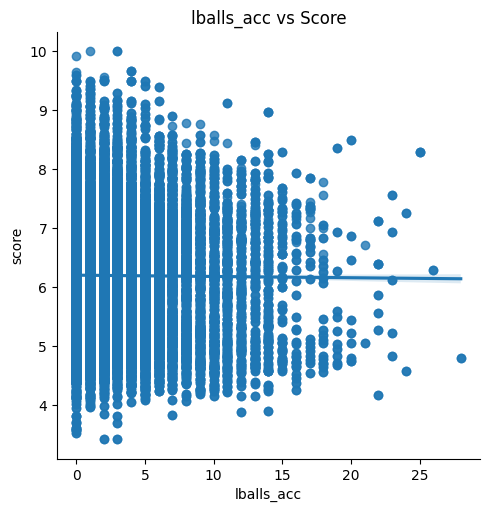

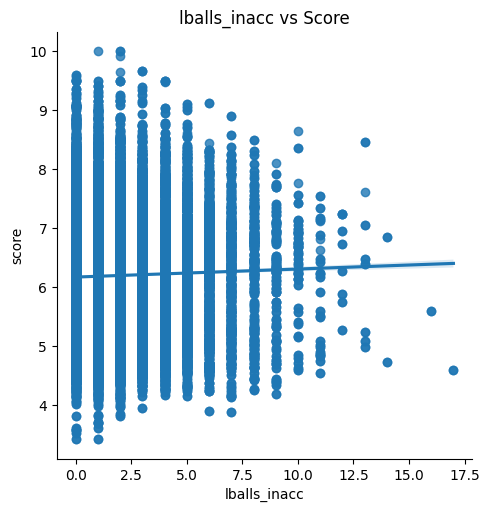

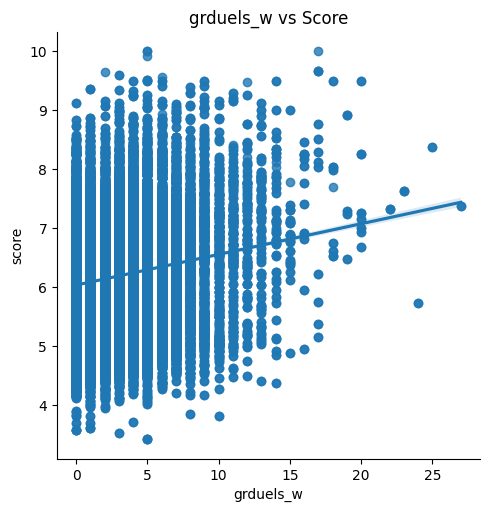

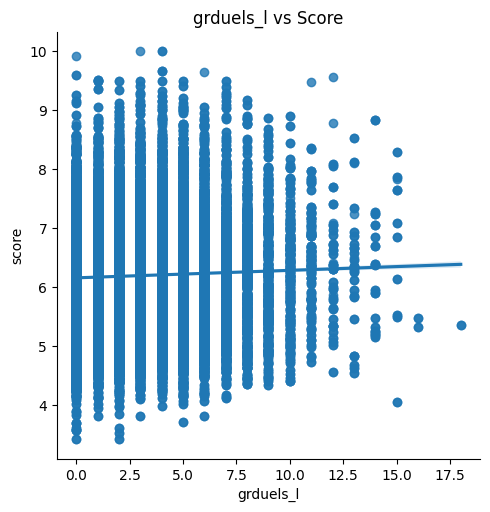

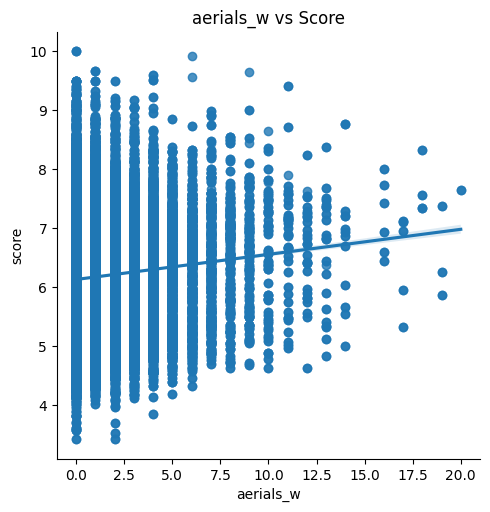

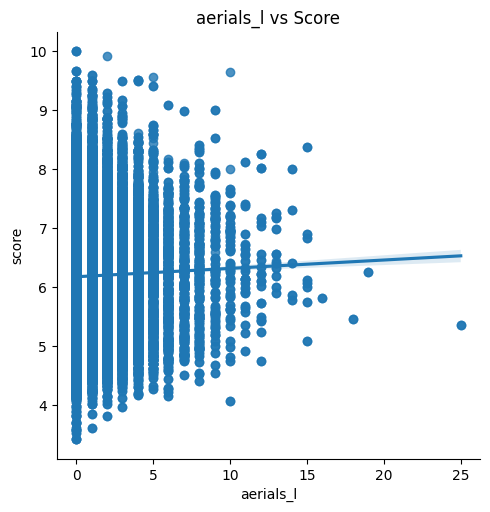

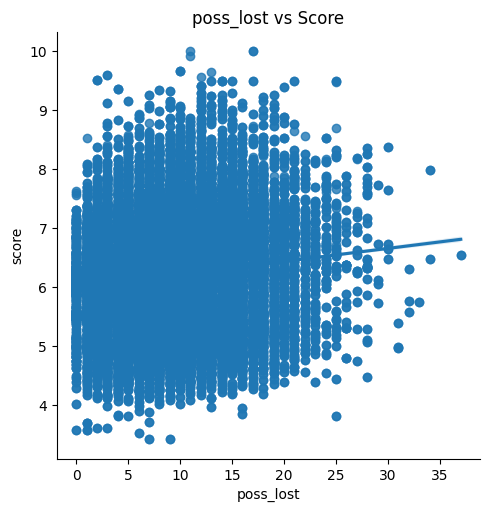

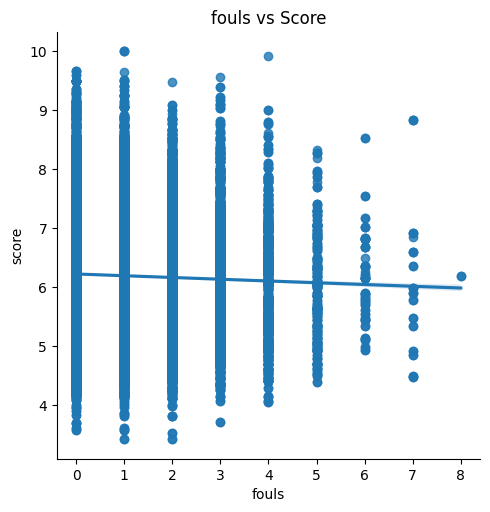

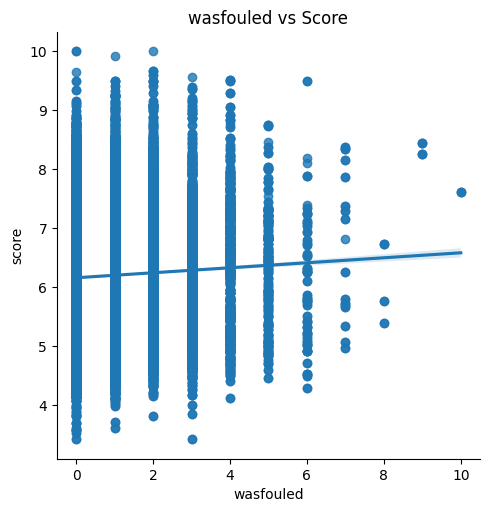

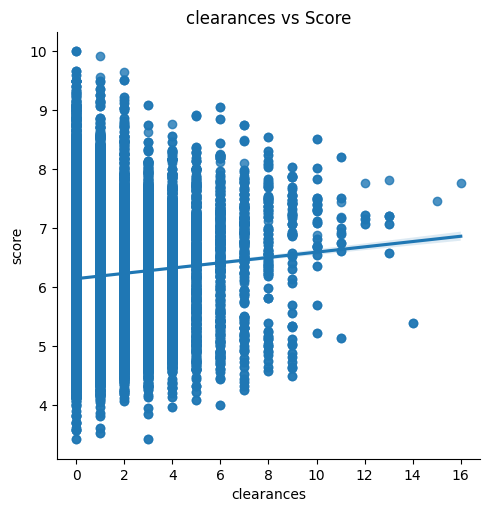

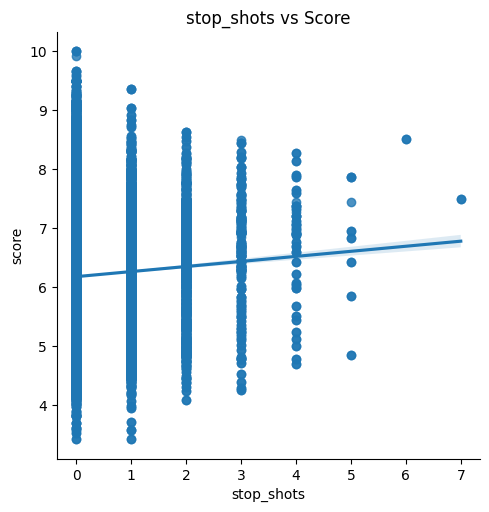

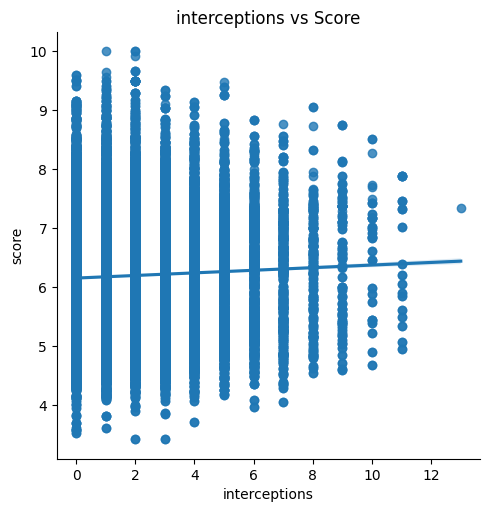

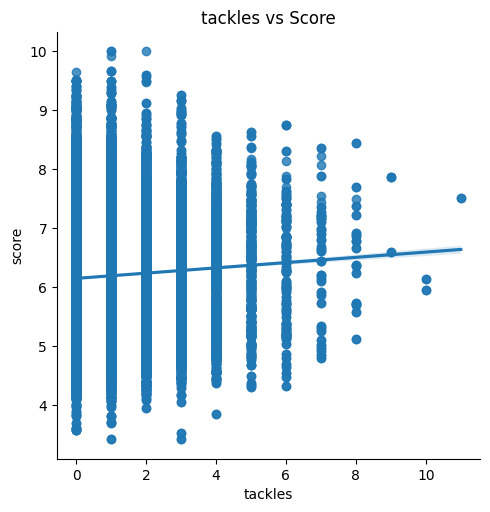

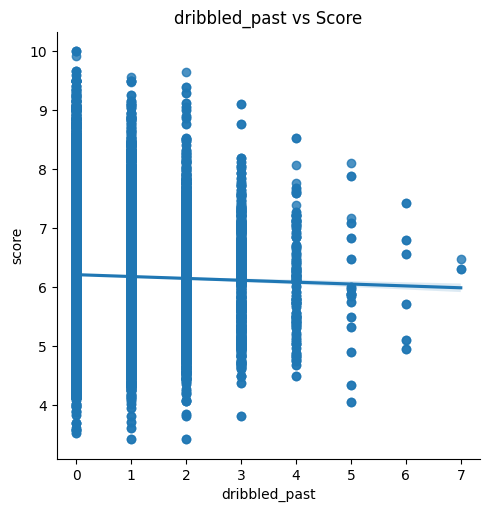

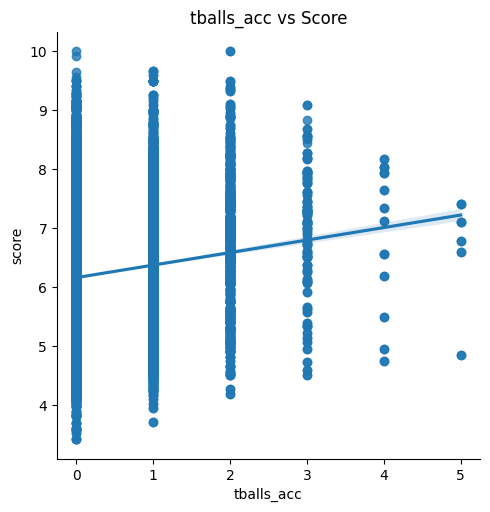

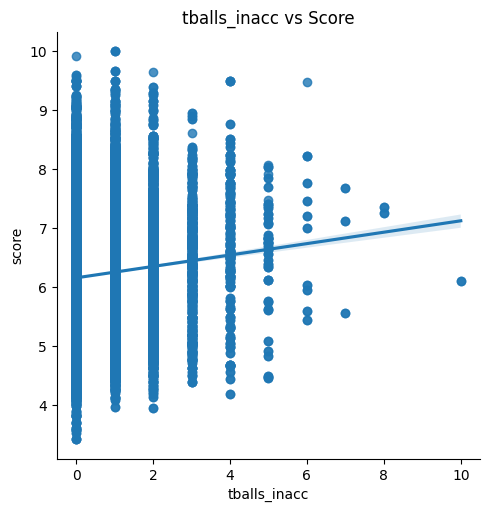

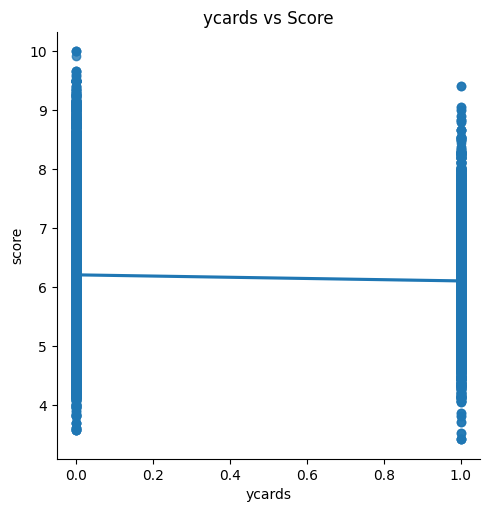

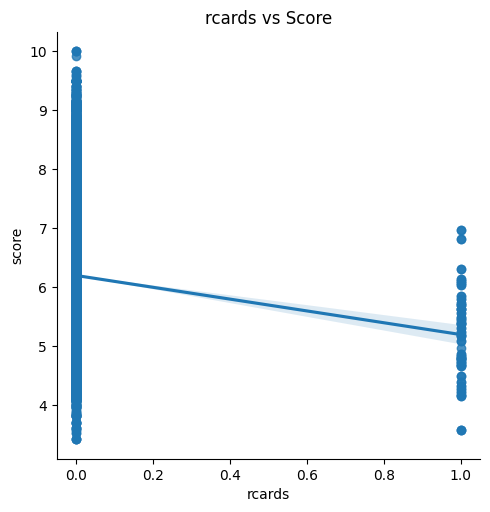

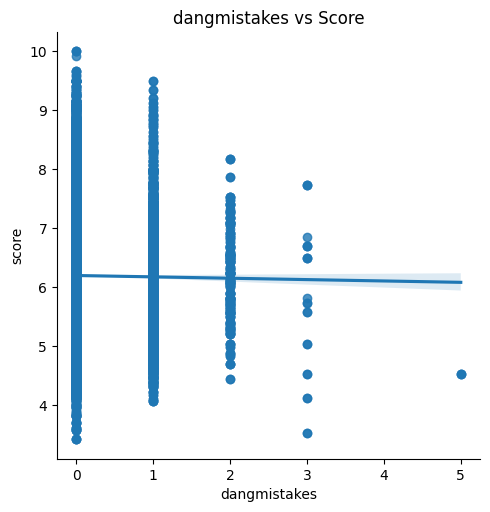

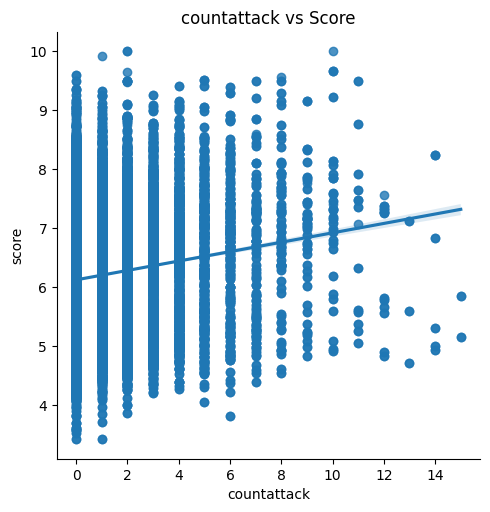

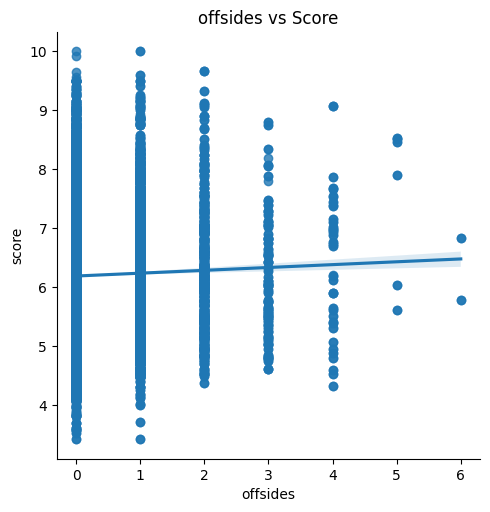

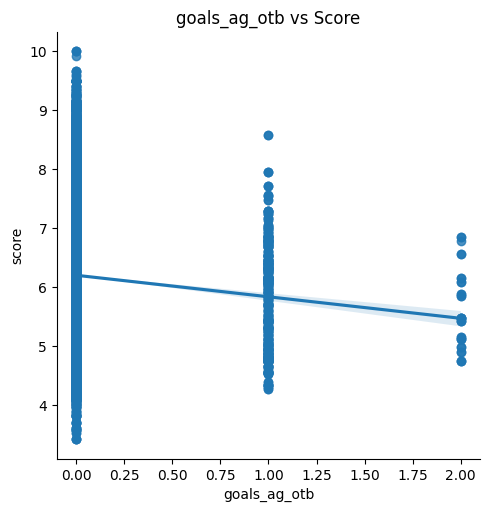

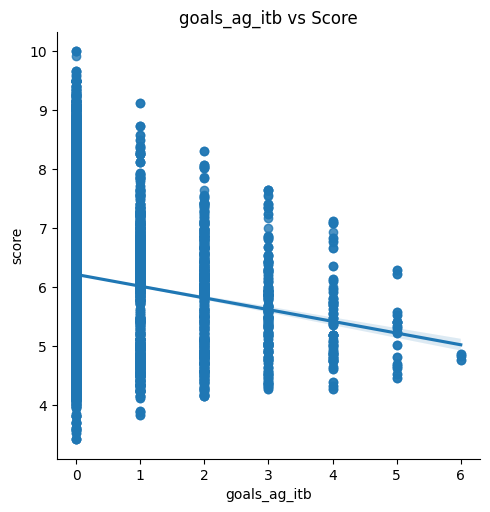

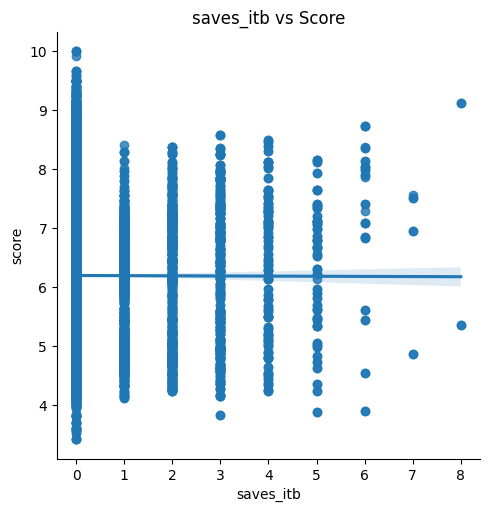

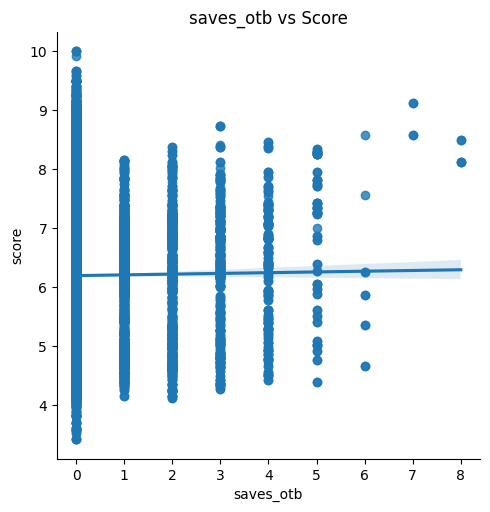

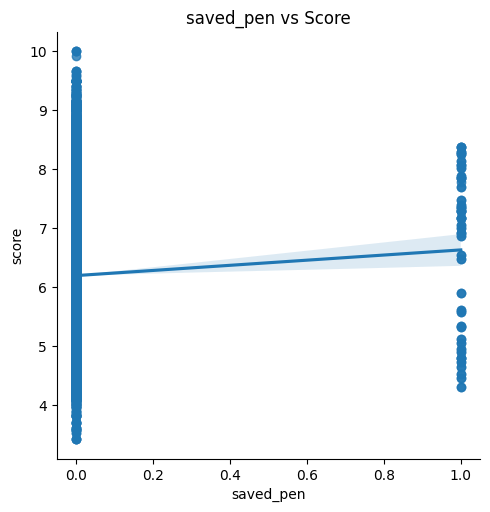

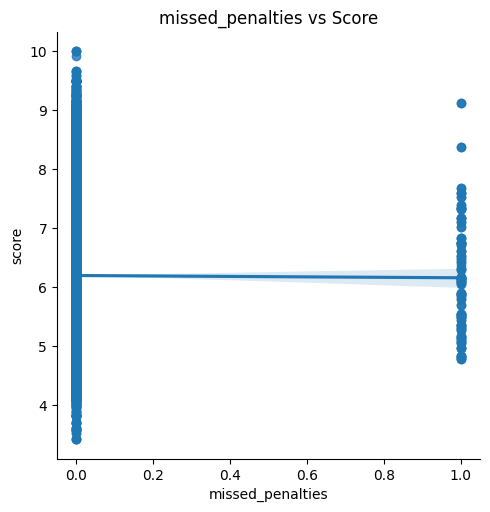

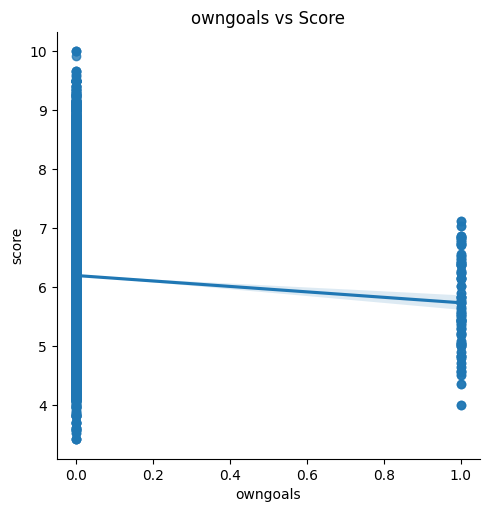

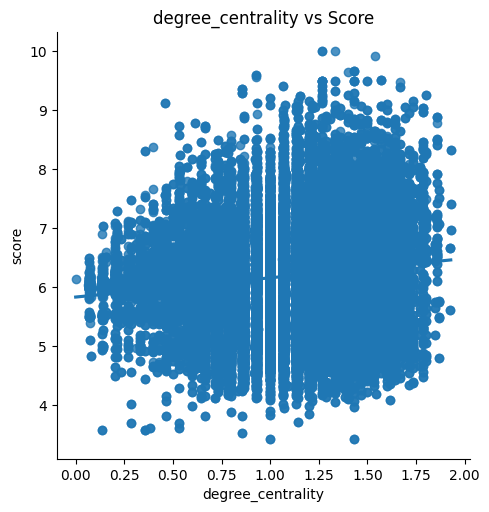

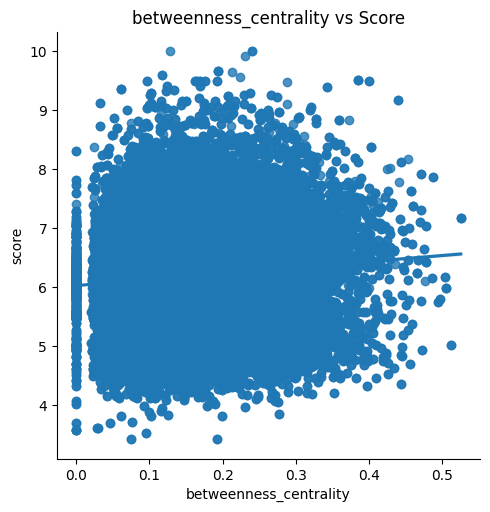

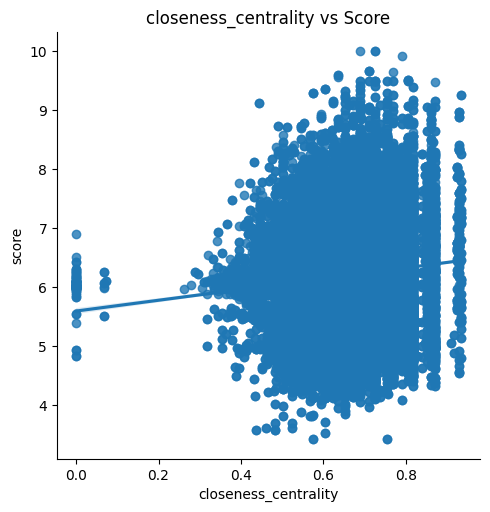

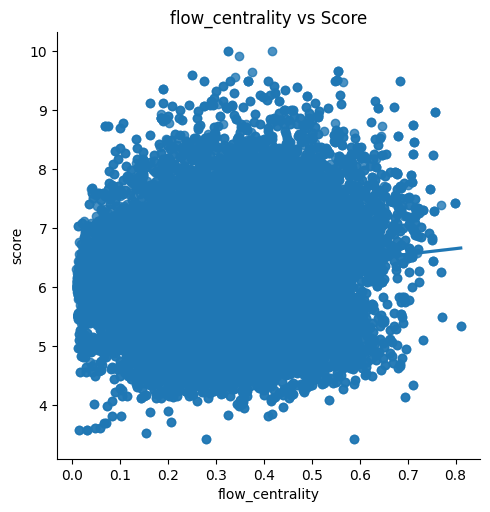

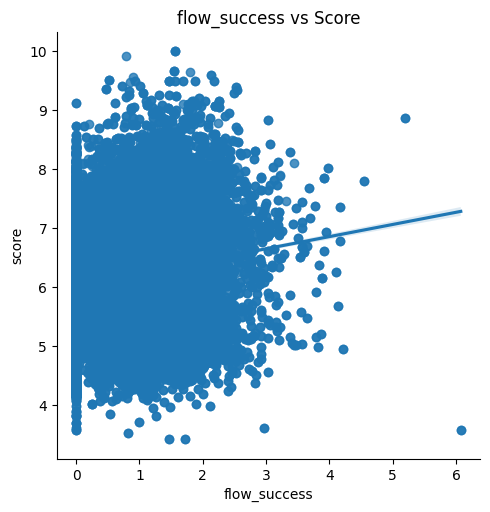

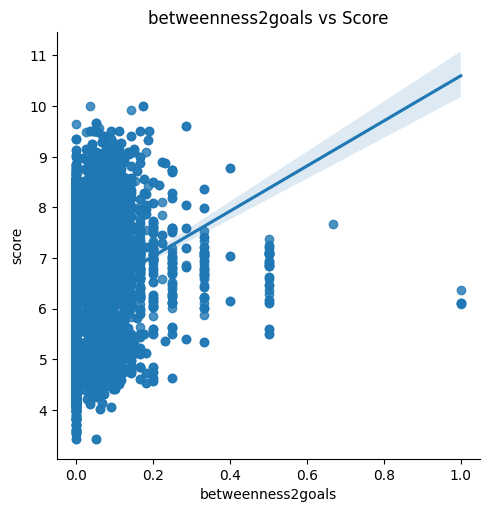

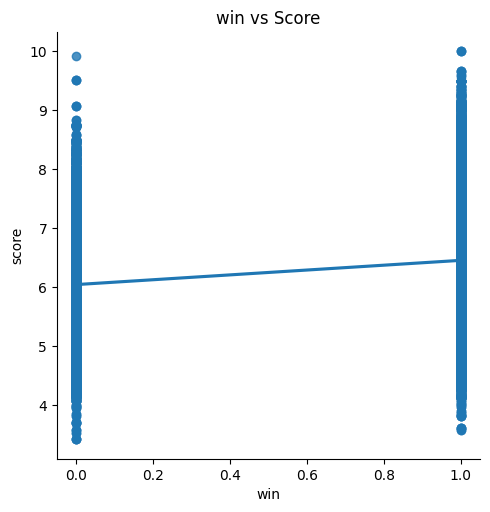

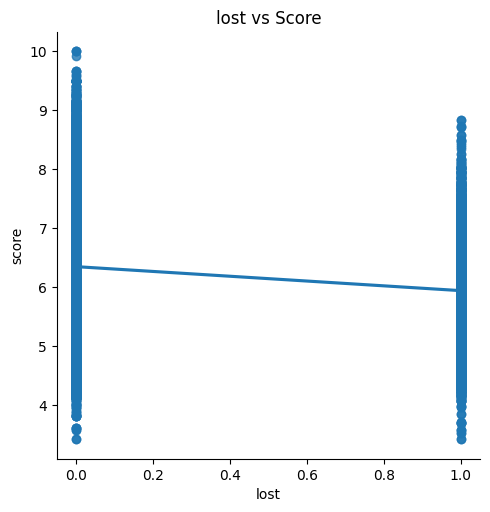

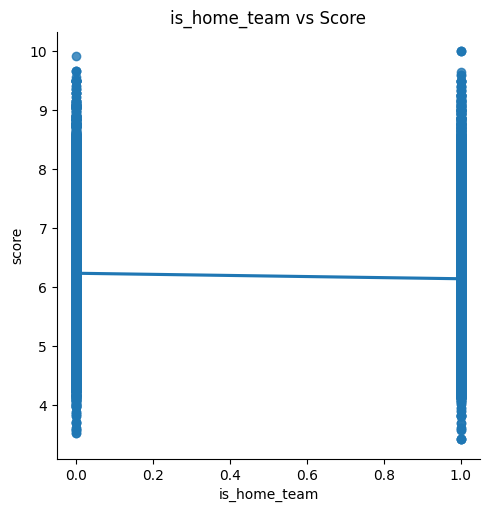

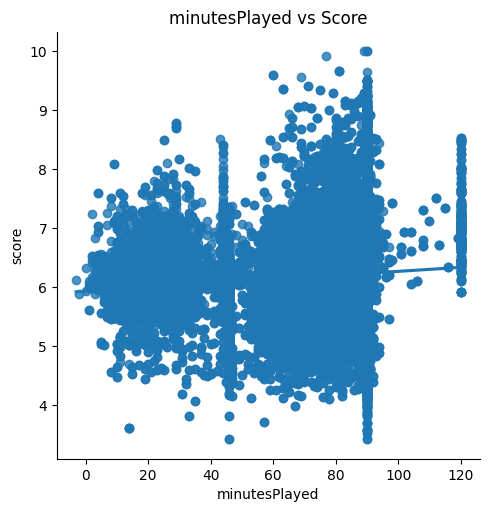

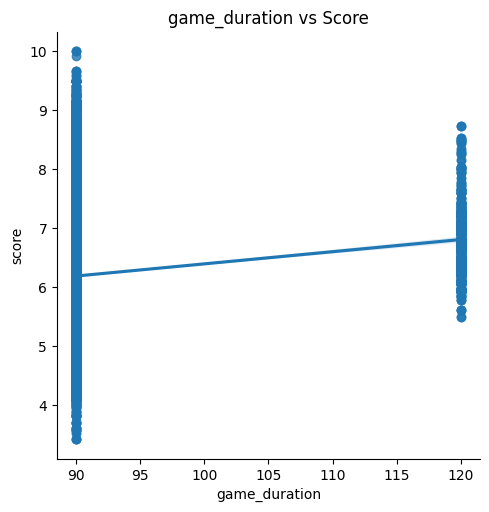

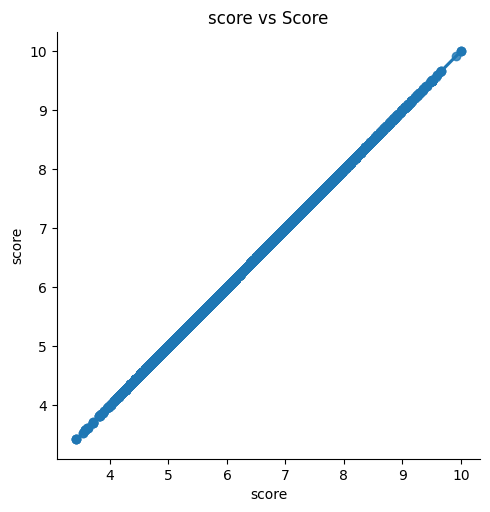

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Parcourir les colonnes du DataFrame
for column in df1.columns:
    # Vérifier si la colonne n'est pas de type "object"
    if df1[column].dtype != 'object':
        # Tracer la régression linéaire
        sns.lmplot(x=column, y="score", data=df1)
        
        # Ajouter des labels d'axe et un titre
        plt.xlabel(column)
        plt.ylabel("score")
        plt.title(f"{column} vs Score")
        
        # Afficher le graphique
        plt.show()

(13565, 5)
Mean Squared Error (MSE): 0.7928587898925571
Coefficient de détermination (R^2): 0.01966207000892617
Mean Absolute Error (MAE): 0.7093719526446675


In [37]:
y = df1["score"]
value_counts = y.value_counts().to_frame().reset_index()
value_counts.columns = ["Valeur", "Occurrences"]
print(value_counts.to_string(index=False))






   Valeur  Occurrences
 6.160000          146
 6.090000          143
 6.120000          143
 6.010000          140
 6.150000          137
 6.250000          136
 6.000000          135
 5.990000          135
 6.040000          132
 6.130000          127
 6.290000          121
 6.370000          120
 6.430000          118
 6.070000          116
 6.200000          113
 6.210000          111
 5.980000          111
 6.100000          110
 6.180000          108
 6.050000          106
 6.680000          105
 6.170000          105
 6.195000          104
 6.270000          103
 5.960000          101
 6.400000          101
 6.055000          100
 6.025000          100
 6.260000           99
 6.380000           98
 6.005000           98
 6.340000           98
 6.230000           97
 6.080000           97
 6.045000           96
 6.020000           96
 6.480000           94
 6.060000           94
 6.320000           93
 5.625000           92
 6.410000           92
 6.035000           92
 5.485000  

ValueError: Unknown label type: 'continuous'

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Sélectionner les variables indépendantes (X) et la variable dépendante (y)
X = df1.drop(labels=["competition", "match", "pos", "date", "team", "pos_role", "player", "rater", "is_human", "original_rating", "is_home_team", "game_duration"], axis=1)
y = df1["score"]

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Créer une instance du modèle RandomForestRegressor avec le nombre d'estimateurs fixé à 100
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Adapter le modèle aux données d'entraînement
model.fit(X_train, y_train)

# Effectuer des prédictions sur les données de test
y_pred = model.predict(X_test)

# Évaluer le modèle sur les données de test
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Effectuer des prédictions sur les données d'entraînement
y_pred_train = model.predict(X_train)

# Évaluer le modèle sur les données d'entraînement
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)

# Afficher les métriques d'évaluation pour les données d'entraînement
print("Train Mean Squared Error (MSE):", mse_train)
print("Train Coefficient de détermination (R^2):", r2_train)
print("Train Mean Absolute Error (MAE):", mae_train)

# Afficher les métriques d'évaluation pour les données de test
print("Test Mean Squared Error (MSE):", mse)
print("Test Coefficient de détermination (R^2):", r2)
print("Test Mean Absolute Error (MAE):", mae)

Train Mean Squared Error (MSE): 8.248237775684401e-07
Train Coefficient de détermination (R^2): 0.9999989715851435
Train Mean Absolute Error (MAE): 3.8785492002751625e-05
Test Mean Squared Error (MSE): 3.173676526240631e-06
Test Coefficient de détermination (R^2): 0.9999961376943299
Test Mean Absolute Error (MAE): 0.00011623281839749988


In [87]:
import numpy as np

courtois_predect = np.array(first_row)  # Ajout d'une valeur par défaut pour la colonne manquante
courtois_predect = courtois_predect.reshape(1, -1)
y_predcourtois = model.predict(courtois_predect)

C:\Users\ADNAN MHEDAOUI\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [88]:
y_predcourtois

array([6.54])